In [28]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [29]:
regr = linear_model.LinearRegression()

In [30]:
X = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]
regr.fit(X,y)

LinearRegression()

In [31]:
score = regr.score(X,y)
print("The score of this line for the data: ", score)

The score of this line for the data:  0.903203123105647


In [32]:
input_data = [[180],[185]]
result = regr.predict(input_data)
print(result)

[63.71244635 66.47353362]


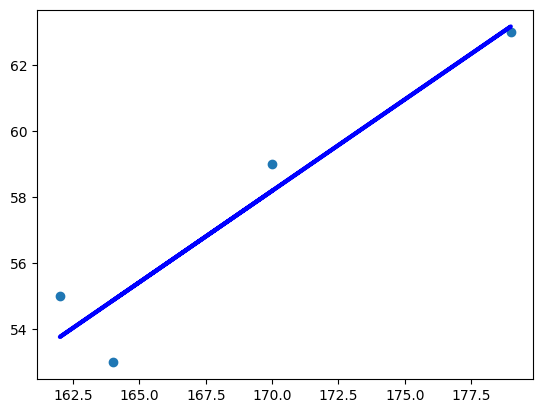

In [33]:
plt.scatter(X,y)
y_pred = regr.predict(X)

plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

### 선형 회귀 알고리즘을 활용한 회귀 모델 만들기

In [34]:
# 학습을 위한 데이터 준비

X = [[2.1],[10],[3],[1],[3.5],[5],[8]]
y = [64.9,292.6,85.9,30.92,110.5,163.4,163.4]


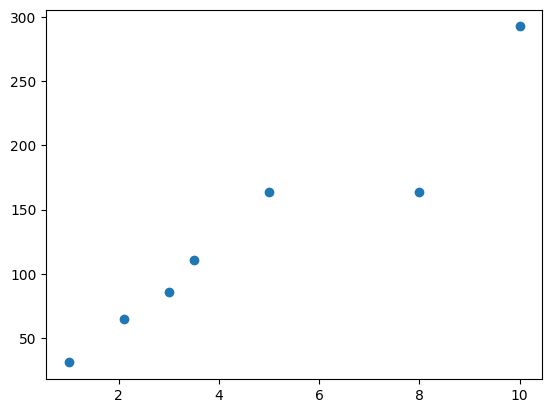

In [35]:
# 상관도 분석

plt.scatter(X,y)

In [36]:
# 선형 회귀 알고리즘 객체 생성

regr = linear_model.LinearRegression()

In [37]:
# 선형 회귀 객체 모델의 학습을 수행하여 머신러닝 모델 생성

regr.fit(X,y)

LinearRegression()

In [38]:
# 예측값 생성(예측하기 (지배 면적 7,12에 대한 수확량 예측))

score = regr.score(X,y)
print(score)

0.9084260459892224


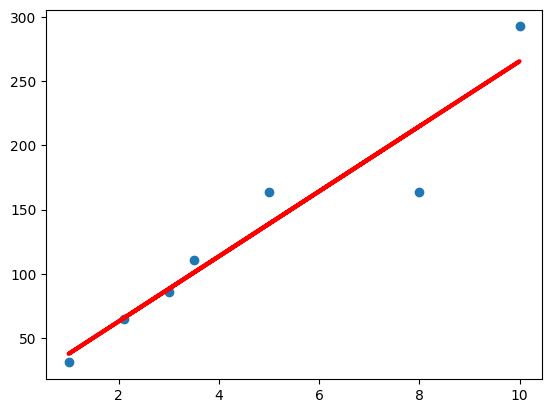

In [39]:
plt.scatter(X,y)
y_pred = regr.predict(X)
plt.plot(X, y_pred, color = 'red', linewidth=3)
plt.show()

In [40]:
input_data2 = [[7],[12]]
result2 = regr.predict(input_data2)
print(result2)

[189.55106566 316.14785212]


### 부모의 키 데이터를 측정하여 자녀의 키가 속하는 그룹을 예측

In [41]:
# 간단한 샘플 데이터 생성

parents_height = [[180,165],[175,160],[180,172],[165,160],[171,152]]
child_height = [3,2,2,1,1]

In [44]:
# 사이킷런(Scikit-Learn) 결정트리 모델 생성

from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

In [45]:
# 모델에 데이터 적용

dt_model.fit(parents_height, child_height)

DecisionTreeClassifier()

In [73]:
# 예측하기

dt_pred=dt_model.predict([[175,153]])
dt_pred

array([2])

### 학생의 과목수와 공부시간으로 시험 점수 예측

In [49]:
### 데이터 불러오기

import pandas as pd
std_df = pd.read_csv('Student_Marks.csv')
std_df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [50]:
# 데이터 통계치

std_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [51]:
# 데이터 개수 및 속성

std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [52]:
# 데이터의 상위 부분 확인

std_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [53]:
# 데이터의 하위 부분 확인

std_df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [54]:
# 각 속성 간의 상관관계

std_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


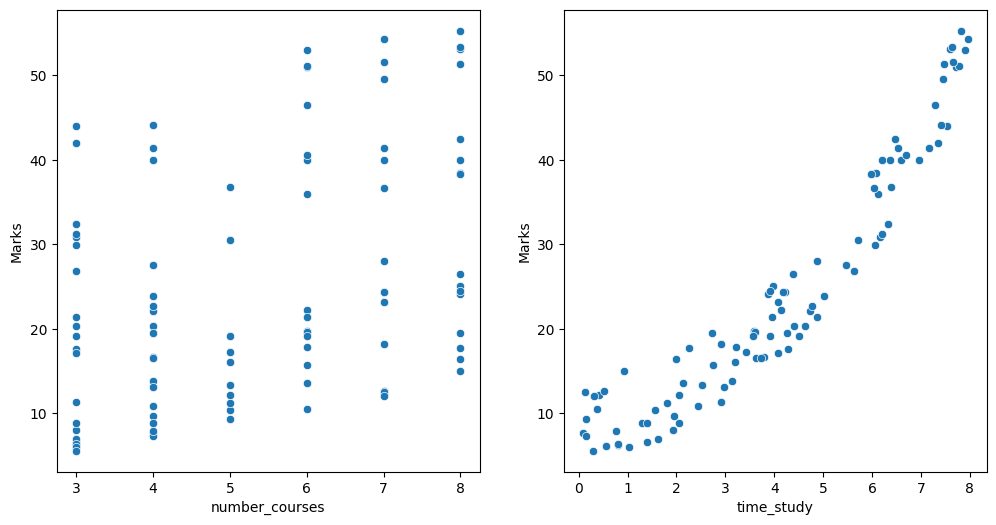

In [56]:
# 산점도 표현

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=std_df, x='number_courses', y='Marks', ax=ax[0])
sns.scatterplot(data=std_df, x='time_study', y='Marks', ax=ax[1])
plt.show()

In [60]:
# train_test_split 함수를 사용하여 데이터셋을 훈련(train)셋과 테스트(test)셋으로 분할

from sklearn.model_selection import train_test_split
x=std_df.drop('Marks',axis=1)
y=std_df['Marks']
X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size=0.2, random_state=42)

In [62]:
# 선형회귀 알고리즘 모델 생성

from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [63]:
# 학습하기

lr_model.fit(X_train,Y_train)

LinearRegression()

In [69]:
# 모델 평가하기

lr_pred=lr_model.predict(X_test)
lr_pred

array([19.27278272, 37.76035676, 20.18779372,  9.65670863, 10.97508223,
       44.81200554, 13.34810968, 47.62447209, 37.01567001, 22.30738483,
       44.48113375, 28.33573684,  7.42332402, 38.70638699, 28.10820618,
       48.74122069, 35.72331468, 39.30103485, 28.29432156,  8.94326632])

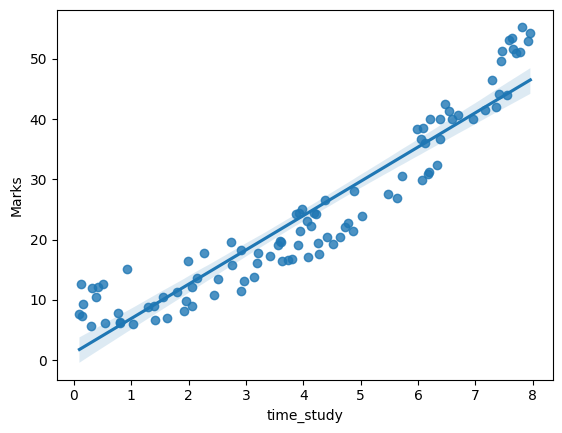

In [72]:
# 시험 점수와 공부시간의 관계를 회귀선으로 표현

sns.regplot(x=std_df['time_study'],y=std_df['Marks'])
plt.show()